### Q1 
#### 1-1)  Convert the image from RGB to gray, using a standard RGB-intensity conversion approach like NTSC, and store the converted image “LennaGray.jpg” as an 8-bit gray image. 

In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
from PIL import Image

(256, 256)


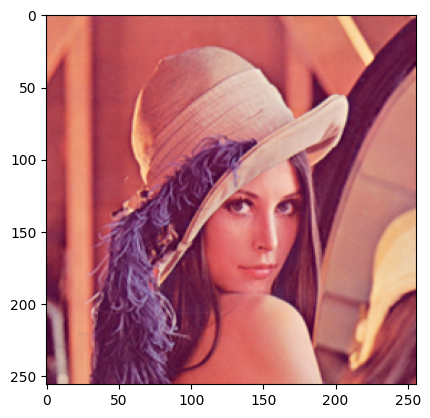

In [131]:
img = Image.open("Lenna.jpg")
plt.imshow(img)
print(img.size)

In [132]:
img_np = np.array(img)
print(img_np.shape)
#print(img_np)


(256, 256, 3)


In [133]:
lenna_gray = img.convert('L', matrix=(0.299, 0.587, 0.114, 0))
lenna_gray_np = np.array(lenna_gray)
print(lenna_gray_np.shape)

(256, 256)


In [134]:
# Save the grayscale image
lenna_gray.save('LennaGray.jpg')

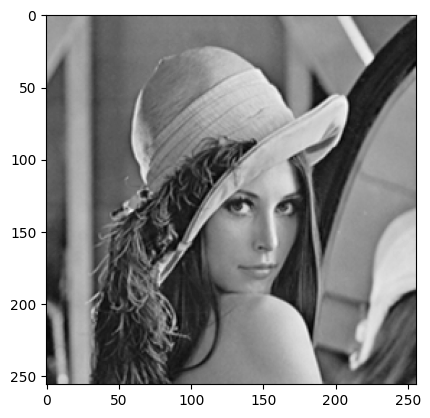

In [135]:
plt.imshow(lenna_gray, cmap='gray')

In [136]:
print(lenna_gray_np)

[[162 161 161 ... 171 169 145]
 [162 160 160 ... 177 176 153]
 [163 160 160 ... 155 140 112]
 ...
 [ 50  51  52 ...  82  93  93]
 [ 46  50  50 ...  93 100 100]
 [ 45  51  50 ...  98 104 107]]


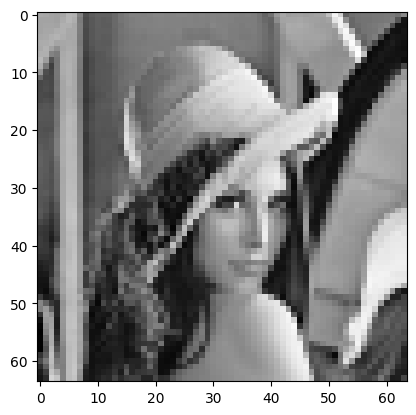

In [137]:
downsampled = lenna_gray.resize((64, 64), resample=Image.BOX)
plt.imshow(downsampled, cmap='gray')

In [138]:
downsampled.save('downsampled_gray.jpg')

(254, 254)


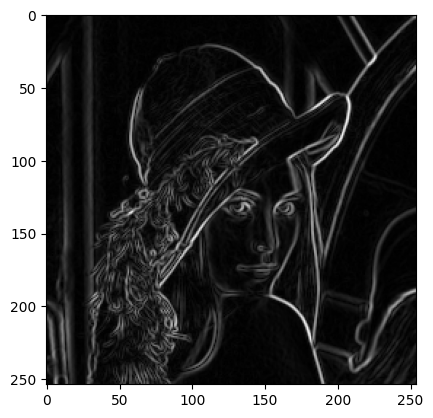

In [139]:
img = Image.open("Lenna.jpg")
width, height = img.size

gray_pixels = lenna_gray_np

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

gx = np.zeros((height-2, width-2))
#print(gx.shape)
gy = np.zeros((height-2, width-2))

for y in range(1, height-1):
    for x in range(1, width-1):
        gx[y-1, x-1] = np.sum(sobel_x * gray_pixels[y-1:y+2, x-1:x+2])
        gy[y-1, x-1] = np.sum(sobel_y * gray_pixels[y-1:y+2, x-1:x+2])

grad_mag = np.sqrt(gx**2 + gy**2)
print(grad_mag.shape)

# Normalize the gradient magnitude to 8-bit range
grad_mag *= 255.0 / np.max(grad_mag)
mag = np.round(grad_mag).astype(np.uint8)

# Save the result
lenna_edges = Image.fromarray(mag)
plt.imshow(lenna_edges, cmap='gray')
lenna_edges.save('lenna_edges.png')

### Q2

(256,)
(257,)


Text(0.5, 1.0, 'Histogram Distribution')

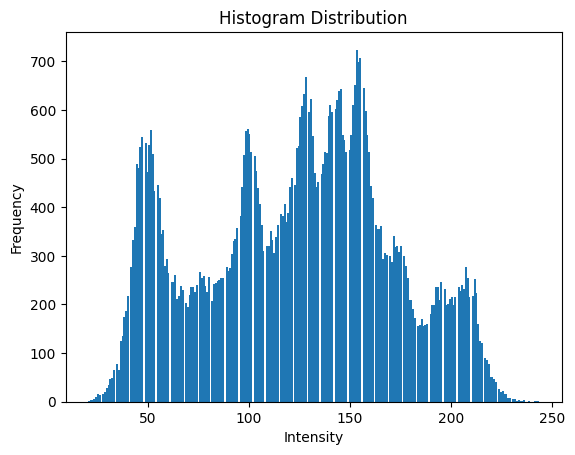

In [140]:
hist,bins = np.histogram(lenna_gray,256)
print(hist.shape)
print(bins.shape)
plt.bar(bins[:-1],hist, width=1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram Distribution')


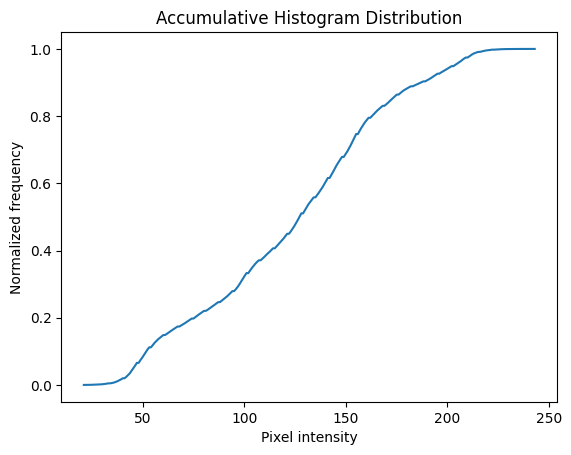

In [141]:
# Accumulative Histogram Distribution
cum_hist = np.cumsum(hist)

accum_hist = cum_hist / float(np.sum(hist))

# Plot the accumulative histogram distribution
plt.plot(bins[:-1], accum_hist)
plt.xlabel('Pixel intensity')
plt.ylabel('Normalized frequency')
plt.title('Accumulative Histogram Distribution')
plt.show()

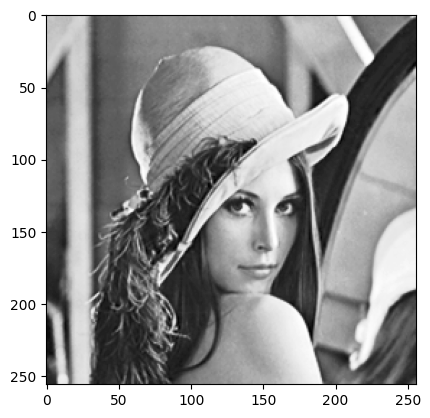

In [142]:
# Histogram equalization
# histogram_array = np.bincount(lenna_gray_np.flatten(), minlength=256)
# num_pixels = np.sum(histogram_array)
# histogram_array = histogram_array/num_pixels
# chistogram_array = np.cumsum(histogram_array)
#plt.plot(chistogram_array)
transform_map = np.floor(255 * accum_hist).astype(np.uint8)
img_list = list(lenna_gray_np.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), lenna_gray_np.shape)
eq_img = Image.fromarray(eq_img_array, mode='L')
plt.imshow(eq_img, cmap='gray')


Text(0.5, 1.0, 'Histogram Distribution with Equalization')

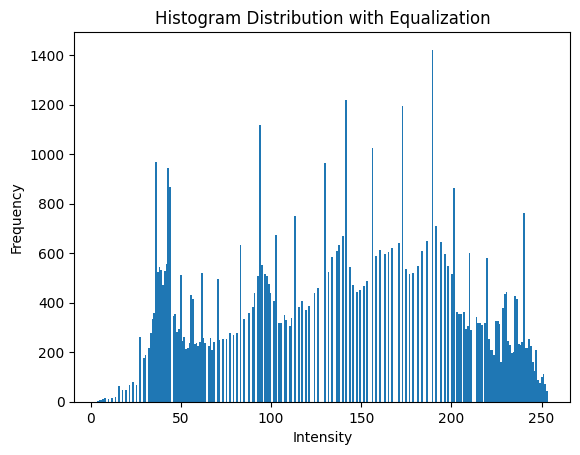

In [143]:
hist,bins = np.histogram(eq_img,256)
plt.bar(bins[:-1],hist, width=1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram Distribution with Equalization')

### Q3

(480, 320)


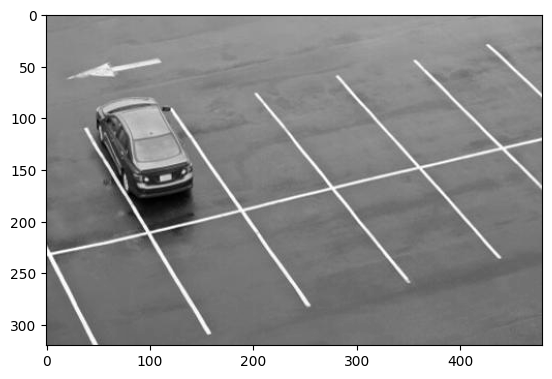

In [144]:
img = Image.open("ParkingLot.jpg")
plt.imshow(img, cmap='gray')
print(img.size)

Text(0.5, 1.0, 'Histogram Distribution')

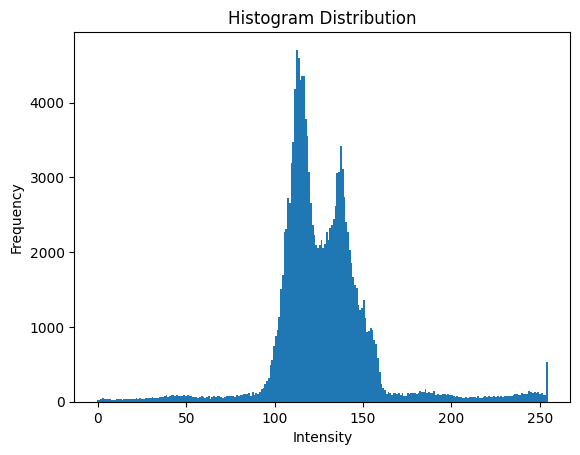

In [145]:
# Histogram Analysis
width, height = img.size
hist,bins = np.histogram(img,256)
plt.bar(bins[:-1],hist, width=1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram Distribution')

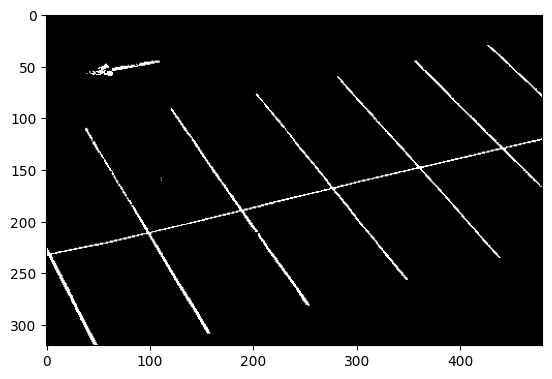

In [146]:
t = 220
img_np = np.array(img)
binary_mask = img_np > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

(1155, 2880)


(-0.5, 2879.5, 1154.5, -0.5)

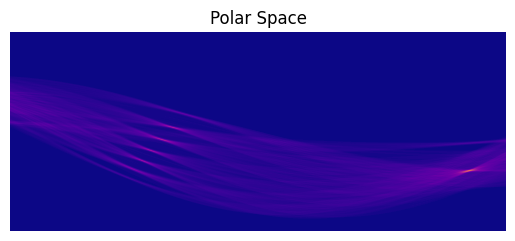

In [147]:
import cv2
from skimage.transform import (hough_line, hough_line_peaks)

img = cv2.imread('binary.jpg',0)
#plt.imshow(img, cmap='gray')
tested_angles = np.linspace(-np.pi/2, np.pi/2, 360*8)

hspace, theta, dist = hough_line(img, tested_angles)
print(hspace.shape)
#plt.figure(figsize=(,10))
#plt.imshow(hspace, cmap=plt.cm.Blues)
plt.imshow(hspace, cmap='plasma')

#plt.grid()
plt.xlabel('theta [deg]')
plt.ylabel('R')
plt.title('Polar Space')
plt.axis('off')

480


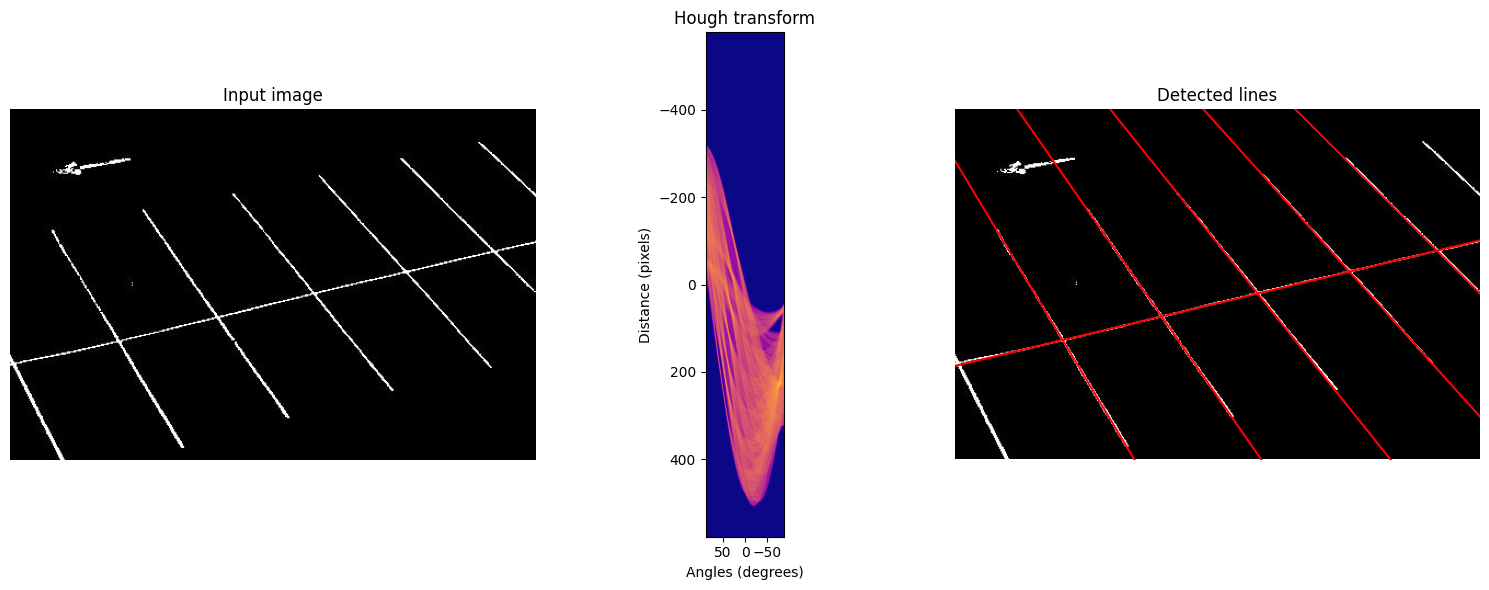

[76.55783258075719, -34.855852726641196, -41.983327544286205, -38.66967697117054, -45.04689128169503, -30.979506773185136]
[228.0, 47.0, 169.0, 111.0, 220.0, -24.0]


In [148]:
# h,q,d = hough_line_peaks(hspace, theta, dist,threshold=100)
# print(h)
# print(d)
# print(q)
hspace, theta, dist = hough_line(img, tested_angles)
angle_list=[]  #Create an empty list to capture all angles
dist_list = []

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='plasma', aspect=3/1)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img, cmap='gray')

origin = np.array((0, img.shape[1]))
print(img.shape[1])
y = []
for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist, threshold=200)):
    angle_list.append(angle) 
    dist_list.append(dist)
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
    y.append([y0,y1])
ax[2].set_xlim(origin)
ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

angles = [a*180/np.pi for a in angle_list]
print(angles)
print(dist_list)

[[234.42197656363757, 119.69647068227404], [-82.23773940495911, 606.957193231257], [-252.64819753184247, 280.75786863164734], [-177.64845215573538, 422.1397362702452], [-310.8726674135248, 168.34230391854888], [46.62625482500692, 846.1280094213256]]
(320, 480, 3)
[  0 480]
[array([  0, 480]), array([  0, 480]), array([  0, 480]), array([  0, 480]), array([  0, 480]), array([  0, 480])]


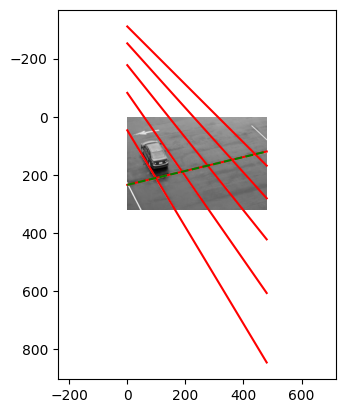

In [149]:
print(y)
image = cv2.imread('ParkingLot.jpg')
print(image.shape)
print(origin)
x = []
x = [origin for i in range(len(y))]
plt.imshow(image)
print(x)
#plt.ylim(-320,0)
for i in range(len(y)):
    plt.plot(x[i],y[i],'-r')
#plt.ylim(image.shape[0],0)
#plt.xlim(0,image.shape[1])
plt.xlim(-0.5*image.shape[1],1.5*image.shape[1])
plt.plot(x[0],y[0],'--g')


#### Q3-4) Design and implement the approaches to find all parking space polygons with the four vertex points for each parking space

[ 41 223 190 189]
18
18
[-0.22818791946308725, -0.2459016393442623, 1.2281879194630871, 1.6585365853658536, -0.23348017621145375, 1.2348993288590604, 1.6585365853658536, 1.4296296296296296, 1.108974358974359, -0.23137254901960785, 1.4351145038167938, 1.1146496815286624, 1.4318181818181819, 1.0, 1.0, 1.4296296296296296, 1.6694214876033058, 1.111842105263158]
[1.2281879194630871, 1.6585365853658536, 1.2348993288590604, 1.6585365853658536, 1.4296296296296296, 1.108974358974359, 1.4351145038167938, 1.1146496815286624, 1.4318181818181819, 1.0, 1.0, 1.4296296296296296, 1.6694214876033058, 1.111842105263158]


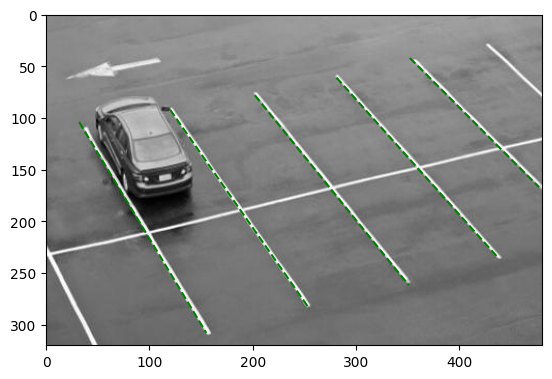

In [150]:
img = cv2.imread('binary.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,100,200 , 1, 7)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=30)

import math

cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
print(lines[0][0])
print(len(lines))
plt.imshow(image,'gray')
plt.ylim(image.shape[0],0)
plt.xlim(0,image.shape[1])
line_list = []
if lines is not None:
    if lines is not None:
        for i in range(0, len(lines)):
            l = lines[i][0]
            #print(l)
            cv2.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,255,255), 3, cv2.LINE_AA)
            #plt.plot([l[0],l[2]],[l[1],l[3]],'o-')
            line = [[l[0],l[2]],[l[1],l[3]]]   #[[x1,x2],[y1,y2]]
            line_list.append(line)


print(len(line_list))
line_list_filtered = []

def slope(line):
    #line [[x1,x2],[y1,y2]]
    x1 = line[0][0]
    x2 = line[0][1]
    y1 = line[1][0]
    y2 = line[1][1]
    m = (y2-y1)/(x2-x1)

    return m
slopes = []
for l in line_list:
    slopes.append(slope(l))
print(slopes)

math.degrees(1.56)
math.degrees(-0.629)

idx = [i for i in range(len(slopes)) if (slopes[i] > -0.25 and slopes[i] < -0.22) ]


def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)

list1 = line_list
list_s = slopes
delete_multiple_element(list1, idx)
delete_multiple_element(list_s, idx)
print(list_s)


def line_len(line):

    x1 = line[0][0]
    x2 = line[0][1]
    y1 = line[1][0]
    y2 = line[1][1]
    length = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    return length

def remove_duplicate_lines(line_list):
    list = []
    idx_covered = set()
    for i in range(len(line_list)):
        if i not in idx_covered:
            line = line_list[i]
            for j in range(i+1,len(line_list)):
                if abs(slope(line)-slope(line_list[j])) < 0.02:
                    idx_covered.add(i)
                    idx_covered.add(j)
                    if line_len(line) < line_len(line_list[j]):
                        line = line_list[j]
                    
            list.append(line)

    return(list)

refined_list = remove_duplicate_lines(list1)
vert = []

for i in range(len(refined_list)):
    plt.plot(refined_list[i][0],refined_list[i][1],'g--')
    vert.append([refined_list[i][0][0],refined_list[i][1][0]])
    vert.append([refined_list[i][0][1],refined_list[i][1][1]])




98.59905773039812
[[202, 78], [351, 262], [32, 104], [155, 308], [120, 92], [255, 285], [281, 61], [438, 236], [352, 42], [477, 167]]


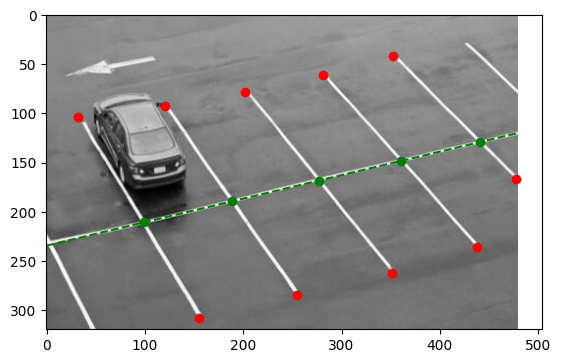

In [151]:
# build a list of coordinates of vertices 
plt.imshow(image)

vert_mid = []
def intersection(line1,line2):

    a1 = line1[1][1] - line1[1][0] # y2-y2
    b1 = line1[0][0] - line1[0][1] # x1-x2
    c1 = a1*(line1[0][0]) + b1*line1[1][0]

    a2 = line2[1][1] - line2[1][0] # y2-y2
    b2 = line2[0][0] - line2[0][1] # x1-x2
    c2 = a2*(line2[0][0]) + b2*line2[1][0]

    det = a1*b2 - a2*b1

    if det == 0:
        return None

    else:
        x = (b2*c1 - b1*c2)/det
        y = (a1*c2 - a2*c1)/det
        vertex = [x,y]
        return vertex
    
for i in range(len(x)-1):
    lin1 = [x[0],y[0]]
    lin2 = [x[i+1],y[i+1]]
    vertices = intersection(lin1,lin2)
    vert_mid.append(vertices)

print(vertices[0])
for i in range(len(vert_mid)):
    plt.plot(vert_mid[i][0],vert_mid[i][1],'og')

for i in range(len(vert)):
    plt.plot(vert[i][0],vert[i][1],'or')

plt.plot(x[0],y[0],'g--')
print(vert)

[  0 480]
[234.42197656363757, 119.69647068227404]


Text(0.5, 1.0, 'Parking Space Polygons')

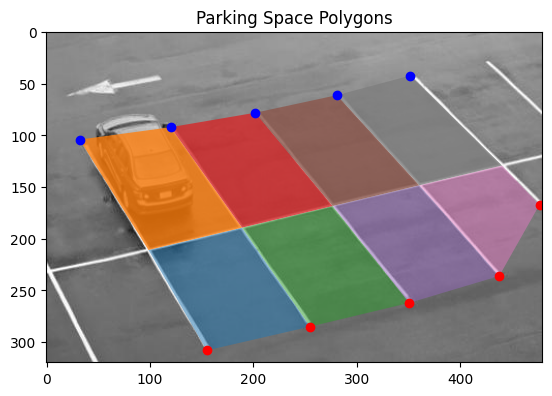

In [152]:
from shapely.geometry import Polygon
# sort points above and below mid-line
plt.imshow(image)
#plt.plot(vert[0][0],vert[0][1],'ro')

print(x[0])
print(y[0])
A = x[0]  # x1,x2
B = y[0]  # y1,y2
x1,x2 = A
y1,y2 = B
#print(x1,y1)
above = []
below = []
x2 = x2-x1
y2 = y2 - y1
for i in range(len(vert)):
    a = vert[i]
    ax = a[0]
    ay = a[1]

    ax = ax-x1
    ay = ay-y1

    cp = (x2*ay) - (y2*ax)
    if cp > 0:
        above.append(a)
    if cp < 0:
        below.append(a)
    #plt.plot(a[0],a[1],'ro')

#plt.plot(A,B,'go--')
for i in range(len(above)):
    plt.plot(above[i][0],above[i][1],'ro')

for i in range(len(below)):
    plt.plot(below[i][0],below[i][1],'bo')

sorted_above = sorted(above, key=lambda p: p[0])
sorted_below = sorted(below, key=lambda p: p[0])
sorted_mid = sorted(vert_mid, key=lambda p: p[0])

j = 0
for i in range(len(sorted_mid)-1):
    P1 = sorted_mid[i]
    P2 = sorted_mid[i+1]
    P3 = sorted_above[i+1]
    P4 = sorted_above[i]
    vertices1 = np.array([(P1[0], P1[1]), (P2[0], P2[1]), (P3[0], P3[1]), (P4[0], P4[1])])
    plt.fill(vertices1[:,0], vertices1[:,1], alpha=0.5)

    P33 = sorted_below[i+1]
    P44 = sorted_below[i]
    vertices2 = np.array([(P1[0], P1[1]), (P2[0], P2[1]), (P33[0], P33[1]), (P44[0], P44[1])])
    plt.fill(vertices2[:,0], vertices2[:,1], alpha=0.8)
    j = j+1

plt.title('Parking Space Polygons')
